In [2]:
import scipy.signal as sig
import scipy.optimize as opt
import numpy as np 
import matplotlib.pyplot as plot

In [3]:
def square_wave_sig(t, A, B, C):
    # A, B, C = constants
    y = A * sig.square(2 * np.pi * B * t) + C
    return(y)

In [4]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 20})
    plot.rcParams.update({'figure.figsize' :[12, 10]})

C:\Users\Nanobiophotonics\.conda\envs\DataAnalysis\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


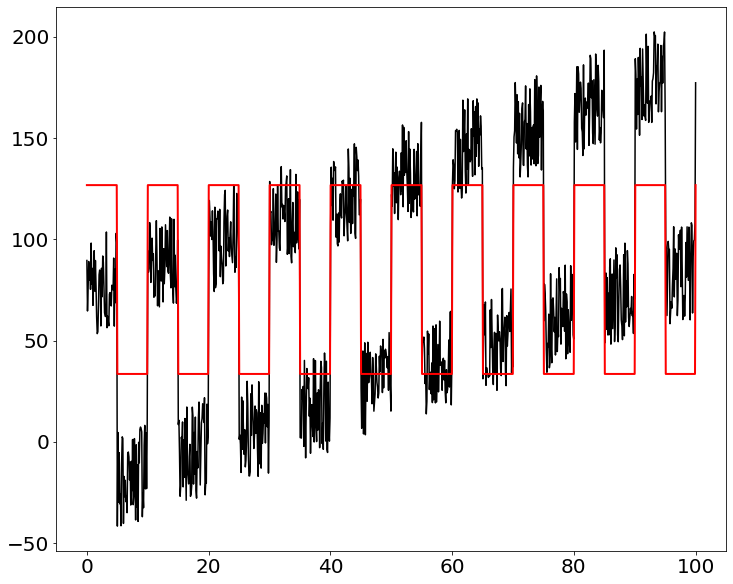

In [8]:
t = np.linspace(0, 100, 1000) # pixel number variable

y_example = square_wave_sig(t, 50, 0.1, 1) + 50*np.random.rand(t.shape[0]) + 1.1*t # Square wave (Amplitude = 1, freq = 2, offest = 4) with noise.

P0 = [2, 0.1, 4] # initial guesses for square wave fitting
set_plot_params() # set the plot size so a human can see it. 

y_fit_coeffs, y_fit_covariance = opt.curve_fit(square_wave_sig, t, y_example, P0) # use the curve_fit tool within the optimise package of scipy. 
                                                                              # It takes, the function, the x and y experiment data, and the 
                                                                              # initial fit parametes. 

# The optimise funtion just gives you the values of the coefficents and not the 
# curve fitting, so we create that in  the line below. 
y_fit = square_wave_sig(t, y_fit_coeffs[0], y_fit_coeffs[1], y_fit_coeffs[2] )

# Now we create the plots. 
plot.plot(t, y_example, color = 'k')
plot.plot(t, y_fit, linewidth = 2, color = 'r')

In [12]:
print(t.shape)

(100,)
